In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_full = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train_x = train_full.iloc[:, :2]
train_y = train_full.iloc[:, 2:].join(train_full['id'])

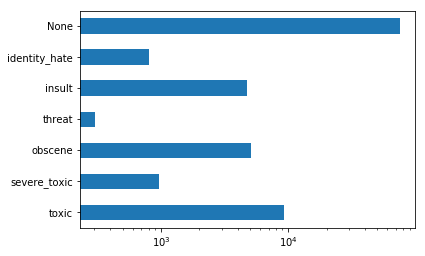

In [6]:
# plot occurance 
## Note some comments have multiple labels
occur_data= train_y.iloc[:, :6].sum(axis = 0)
occur_data = occur_data.append(pd.Series({'None': len(train_y)-sum(occur_data)}))
fig, ax = plt.subplots()
occur_data.plot(kind = 'barh')
ax.set_xscale('log')

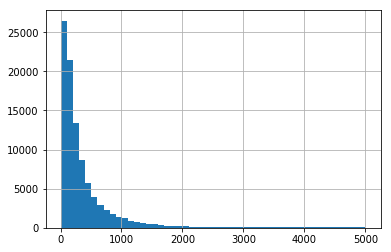

In [7]:
# plot comment length
comment_len = train_x['comment_text'].apply(lambda x: len(x))
comment_len.hist(bins= 50)

## Feature extraction
- tokenize
- should case be preserved? 
- lemmatize/stemming
- stopword removal
- bag of words
- tfidf 

In [21]:
'''
tokenzing is not quite straightforward in casual language (might be used in more toxic comments)  - nltk has a few modules
casual: TweetTokenizer
'''
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize


tweettoken = TweetTokenizer(reduce_len= True) # reduces length of stretched out words: waaaaayyyy ->waaayyy

tweet_split = train_x['comment_text'].apply(lambda x: tweettoken.tokenize(x.lower()))
word_split = train_x['comment_text'].apply(lambda x: word_tokenize(x.lower()))

In [24]:
# stopword and punctuation removal
from nltk.corpus import stopwords
import string
stops = stopwords.words('english') + list(string.punctuation)

tweet_split = tweet_split.apply(lambda row: [x for x in row if x not in stops])
word_split = word_split.apply(lambda row: [x for x in row if x not in stops])
## appears that TweetTokenizer results in a 'cleaner' dataset by avoiding more fillers

In [36]:
subset.head()

0     [nonsense, kiss, geek, said, true, i'll, accou...
20    [hasn't, alitalia, removed, rom, alliance, due...
26    [graceful, slick, ..., non, ungraceful, dick, ...
30    [stupid, soon, saw, phrase, metal, stupid, beg...
32    [ban, one, side, argument, bullshit, nazi, adm...
Name: comment_text, dtype: object

In [38]:
toxic = train_full[train_full['toxic'] >0]

In [41]:
# test different stemmers/ lemmatizers
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

subset = tweet_split.iloc[toxic.index]
port = PorterStemmer()
lan = LancasterStemmer()
snowball = SnowballStemmer("english")
lemma= WordNetLemmatizer()
subset_port = subset.apply(lambda row: [port.stem(x) for x in row])
subset_lan = subset.apply(lambda row: [lan.stem(x) for x in row])
subset_snowball= subset.apply(lambda row: [snowball.stem(x) for x in row])
subset_lemma = subset.apply(lambda row: [lemma.lemmatize(x)for x in row])
# lemma appears to preserve word forms best, but might be too mild to reduce the number of words in the bag of words
# stemming: lancaster appers to have the most liberal reduction: Nazi -> Naz
# port or snowball? 

In [50]:
for x in subset[:15]:
    print(x)

['nonsense', 'kiss', 'geek', 'said', 'true', "i'll", 'account', 'terminated']
["hasn't", 'alitalia', 'removed', 'rom', 'alliance', 'due', 'piss-poor', 'customer', 'service', 'sentiments', 'nummerous', 'flyertalkers']
['graceful', 'slick', '...', 'non', 'ungraceful', 'dick', '86.131', '154.225']
['stupid', 'soon', 'saw', 'phrase', 'metal', 'stupid', 'beginning', 'article', 'assumed', 'misread', 'confirmed', 'indeed', 'say', 'metal', 'stupid', 'assumed', 'vandalism', 'however', "don't", 'know', 'anything', 'chemistry', 'see', 'soviet', 'education', 'system', 'word', 'stupid', 'meaning', 'chemistry', 'would', 'way', 'knowing', 'refuting', 'could', 'someone', 'actually', 'amount', 'knowledge', 'subject', 'confirm', 'whether', 'vandalism', 'typo', 'what-have-you']
['ban', 'one', 'side', 'argument', 'bullshit', 'nazi', 'admin', 'get', 'discussion', 'islamist', 'editors', 'feel']
['gay', 'sound', 'like']
['program', 'last', 'night', 'crime', 'museum', 'blackout', 'ripper', 'called', 'serial',

In [59]:
for x in subset_snowball[:15]:
    print(x)

['nonsens', 'kiss', 'geek', 'said', 'true', "i'll", 'account', 'termin']
["hasn't", 'alitalia', 'remov', 'rom', 'allianc', 'due', 'piss-poor', 'custom', 'servic', 'sentiment', 'nummer', 'flyertalk']
['grace', 'slick', '...', 'non', 'ungrac', 'dick', '86.131', '154.225']
['stupid', 'soon', 'saw', 'phrase', 'metal', 'stupid', 'begin', 'articl', 'assum', 'misread', 'confirm', 'inde', 'say', 'metal', 'stupid', 'assum', 'vandal', 'howev', "don't", 'know', 'anyth', 'chemistri', 'see', 'soviet', 'educ', 'system', 'word', 'stupid', 'mean', 'chemistri', 'would', 'way', 'know', 'refut', 'could', 'someon', 'actual', 'amount', 'knowledg', 'subject', 'confirm', 'whether', 'vandal', 'typo', 'what-have-you']
['ban', 'one', 'side', 'argument', 'bullshit', 'nazi', 'admin', 'get', 'discuss', 'islamist', 'editor', 'feel']
['gay', 'sound', 'like']
['program', 'last', 'night', 'crime', 'museum', 'blackout', 'ripper', 'call', 'serial', 'killer', 'expert', 'polic', 'catch', 'get', 'fact', 'right', 'retard']


In [ ]:
## find a solution to handle unequal categories
# Feature extraction
## stopword removal
## lemmatizing/ stemming?
## bag-of-words + tfidf?
# Machine learning for text classi
## Naive bayes
## SVM
## Logistic regression
## RNN + LSTM